In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [38]:
df = pd.read_csv('Pizza.csv')
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


# Preprocessing

### Features Description
Brand: Pizza brand (class label) <br>
Id: Sample analysed <br>
Mois: Amount of water per 100 grams in the sample <br>
Prot: Amount of protein per 100 grams in the sample <br>
Fat: Amount of fat per 100 grams in the sample <br>
Ash: Amount of ash per 100 grams in the sample <br>
Sodium: Amount of sodium per 100 grams in the sample <br>
Carb: Amount of carbohydrates per 100 grams in the sample <br>
Cal: Amount of calories per 100 grams in the sample <br>

In [39]:
features = ['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'] # Numerical Features

In [40]:
brand_and_id = df[['brand', 'id']]

In [41]:
features_df = df[features]

# PCA

In [42]:
pca = PCA(2) # Reduce to 2D for visualization

In [43]:
reduced_df = pca.fit_transform(features_df)

In [44]:
pca.explained_variance_ratio_ # We reduced our dimensions from 7D to 2D while we saved 96% of the informations!

array([0.78010108, 0.18840661])

In [45]:
final_df = pd.DataFrame(reduced_df, columns=['PC1', 'PC2'])

# Visualization

In [46]:
dff = pd.concat([final_df, brand_and_id['brand']], axis=1)

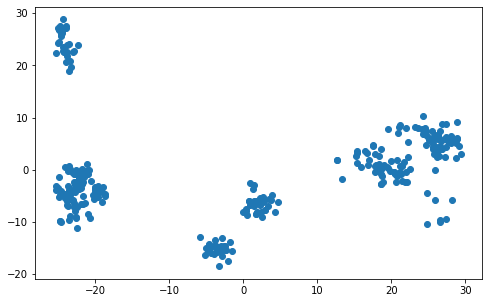

In [47]:
plt.figure(figsize = (8,5))
plt.scatter(final_df['PC1'], final_df['PC2']) # We see clusters here, but we dont know what they are

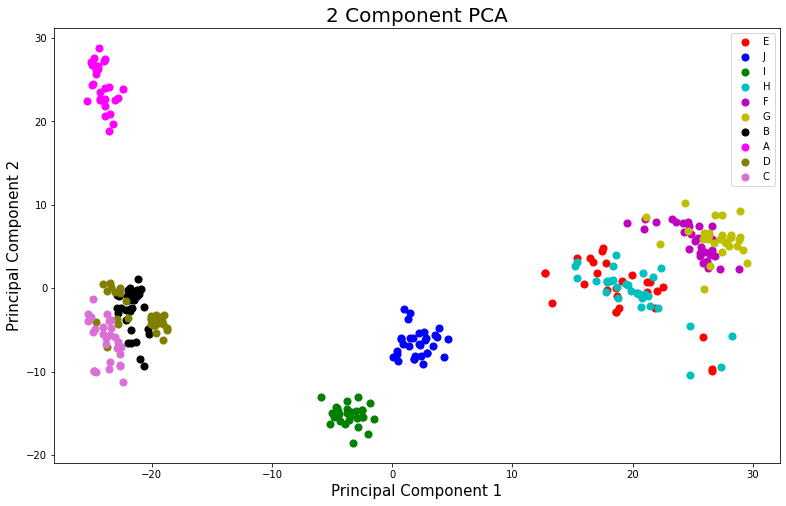

In [48]:
fig = plt.figure(figsize = (13,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = list(set(brand_and_id['brand'].values))
colors = ['r', 'b', 'g','c', 'm', 'y', 'k', '#FF00FF', '#808000', '#DA70D6']

for target, color in zip(targets,colors):
    indicesToKeep = dff['brand'] == target
    ax.scatter(  final_df.loc[indicesToKeep, 'PC1']
               , final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50  )
    
ax.legend(targets)

# What's the difference?

### I got curious about differences between clusters C and G  and I want to see the original data, so I recover them using inverse_transform() function. <br>
As we know, PC1 axis is responsible for 78% of differences (information) while PC2 is responssible for 18% of differences, so the most different clusters to each other are C and G, and the most unique cluster is I, because it is far from other clusters on both axis.

In [49]:
C = dff[dff['brand'] == 'C']
G = dff[dff['brand'] == 'G']

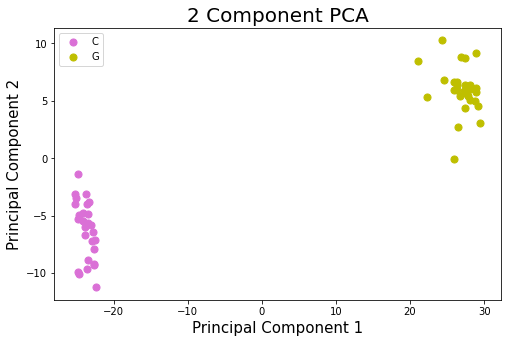

In [50]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['C', 'G']
colors = ['#DA70D6', 'y']

for target, color in zip(targets,colors):
    indicesToKeep = pd.concat([C,G])['brand'] == target
    ax.scatter(  pd.concat([C,G]).loc[indicesToKeep, 'PC1']
               , pd.concat([C,G]).loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50  )
    
ax.legend(targets)

In [51]:
C = dff[dff['brand'] == 'C'].drop(['brand'], axis=1)
G = dff[dff['brand'] == 'G'].drop(['brand'], axis=1)

In [52]:
C_recovered = pca.inverse_transform(C)
C_recovered_df = pd.DataFrame(C_recovered, columns=features)

In [53]:
G_recovered = pca.inverse_transform(G)
G_recovered_df = pd.DataFrame(G_recovered, columns=features)

In [54]:
g_mean = G_recovered_df.mean()

In [55]:
c_mean = C_recovered_df.mean()

In [56]:
df_mean = features_df.mean()

In [57]:
moist, prot, fat, ash, sodium, carb, cal = [],[],[],[],[],[],[]
for i in g_mean, df_mean,c_mean :
    moist += [i[0]]
    prot += [i[1]]
    fat += [i[2]]
    ash += [i[3]]
    sodium += [i[4]]
    carb += [i[5]]
    cal += [i[6]]

In [58]:
rows = ['G', 'df', 'C']
d = {
    'mois' : pd.Series(moist, index=rows),
    'prot' : pd.Series(prot, index=rows),
    'fat': pd.Series(fat, index=rows),
    'ash': pd.Series(ash, index=rows),
    'sodium': pd.Series(sodium, index=rows),
    'carb': pd.Series(carb, index=rows),
    'cal': pd.Series(cal, index=rows),
}

mean_df = pd.DataFrame(d)
mean_df

,mois,prot,fat,ash,sodium,carb,cal
G,28.993306,6.520008,16.643016,1.383080,0.511457,46.461428,3.619962
df,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
C,52.162791,19.370126,22.742406,3.696794,0.785189,2.034701,2.901940


In [59]:
ratio = []
for f in features:
    ratio += [mean_df[f][0]/mean_df[f][2]]

ratio

[0.5558235142652961,
 0.3366012288951744,
 0.7318054077332669,
 0.37412950989632965,
 0.6513810274937685,
 22.83452760115309,
 1.2474282136840746]

 I used ratio to figure out what are the main features causing differences. As we can see, there is a huge difference between feature 'carb' in our two clusters.

Top 3 features that are most responsible for differences are: <br>
1. carb<br>
2. prot<br>
3. ash